In [1]:
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


cpu


In [2]:
%load_ext autoreload
%autoreload 2
%pylab inline

import os
import pickle
import numpy as np
from chainconsumer import ChainConsumer
import cmasher as cmr
import arviz as az
'unset XLA_FLAGS'


Populating the interactive namespace from numpy and matplotlib


'unset XLA_FLAGS'

## Load data

In [3]:

sample=[]
for filename in os.listdir("/gpfs7kw/linkhome/rech/genmfd01/ulm75uc/VMIM-vs-MSE-/data/posterior_full_field_job"):
    fname=os.path.join('/gpfs7kw/linkhome/rech/genmfd01/ulm75uc/VMIM-vs-MSE-/data/posterior_full_field_job',  filename)
    with open(fname, 'rb') as g:
        sample.append(pickle.load(g))

In [4]:
sample_ff=np.stack(sample).reshape(-1, np.stack(sample).shape[-1])

In [5]:
col = cmr.eclipse([0.,0,0.55,0.85]) 
fid_params=np.array([0.2664, 0.0492, 0.831,0.6727,0.9645, -1.0])
name_parameters= ['$\Omega_c$', '$\Omega_b$', '$\sigma_8$', '$h_0$', '$n_s$', '$w_0$']

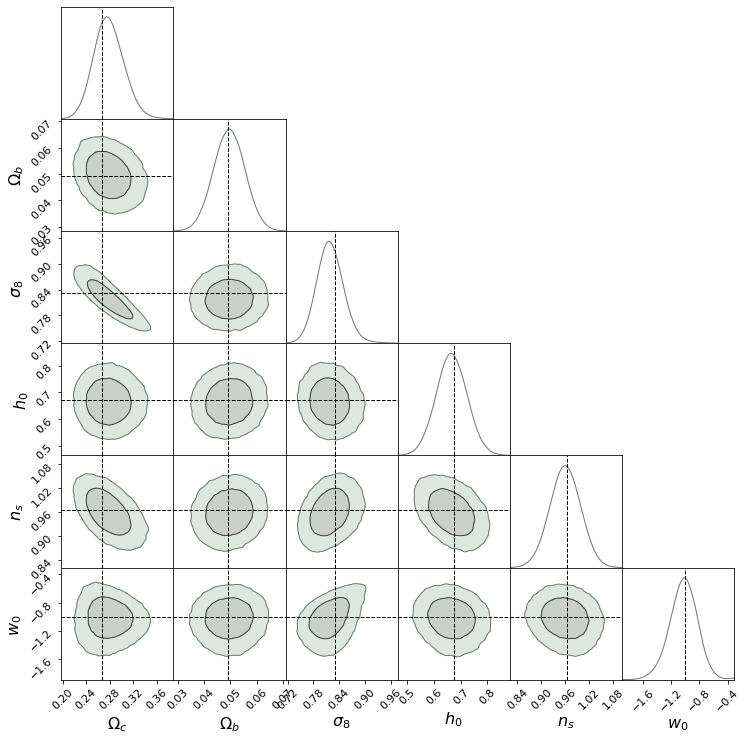

In [6]:
c = ChainConsumer()
c.add_chain([sample_ff[:,i] for i in range(6)], parameters= name_parameters, name = 'SBI HMC')
c.configure(usetex=False,legend_kwargs={'fontsize': 20},linewidths=[1.], shade=[True],linestyles=["-"], shade_alpha=[0.3], bar_shade=[False], tick_font_size=11, colors=[col[2]], label_font_size=16)
fig = c.plotter.plot(truth=fid_params)
fig.set_size_inches(2 + fig.get_size_inches())

In [7]:
with open("posterior_full_field_"
                    "{}N_{}ms_{}gpa_{}se.npy".format(
                       256, 10, 27, 0.26), "wb") as fp:
    pickle.dump(sample_ff, fp)